# OCR Using Quantum Neural Network

---



Dataset Link: https://www.kaggle.com/datasets/preatcher/standard-ocr-dataset/data

In [1]:
from google.colab import files

# Uploading the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Moving the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Downloading the dataset from kaggle
!kaggle datasets download -d preatcher/standard-ocr-dataset

 95% 44.0M/46.2M [00:03<00:00, 22.5MB/s]
100% 46.2M/46.2M [00:03<00:00, 15.0MB/s]


In [4]:
# Unzipping the downloaded dataset
!unzip -q standard-ocr-dataset.zip

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import os
import cv2

# Function to load images from a given folder
def load_images_from_folder(folder_path):
    labels = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)]
    images = []

    for label in labels:
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append((img, label))

    return images

In [7]:
# Path to the main data folder
data_path = "/content/data"

# Loading training data
training_data_path = os.path.join(data_path, "training_data")
training_images = load_images_from_folder(training_data_path)

# Loading testing data
testing_data_path = os.path.join(data_path, "testing_data")
testing_images = load_images_from_folder(testing_data_path)

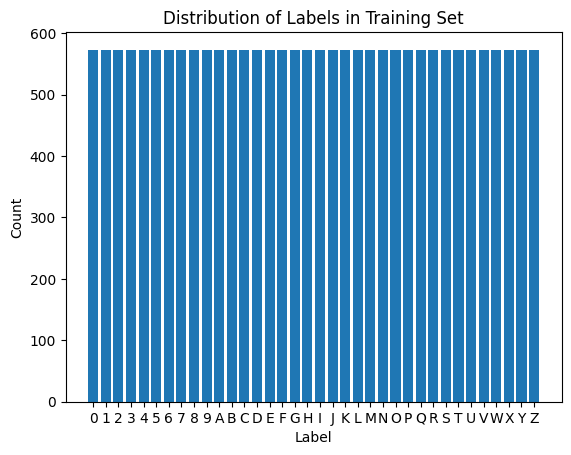

In [8]:
# Defining labels
labels = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)]

# Checking the distribution of labels
label_counts = {label: 0 for label in labels}
for _, label in training_images:
    label_counts[label] += 1

plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Set')
plt.show()

  All the labels have equal number of images.

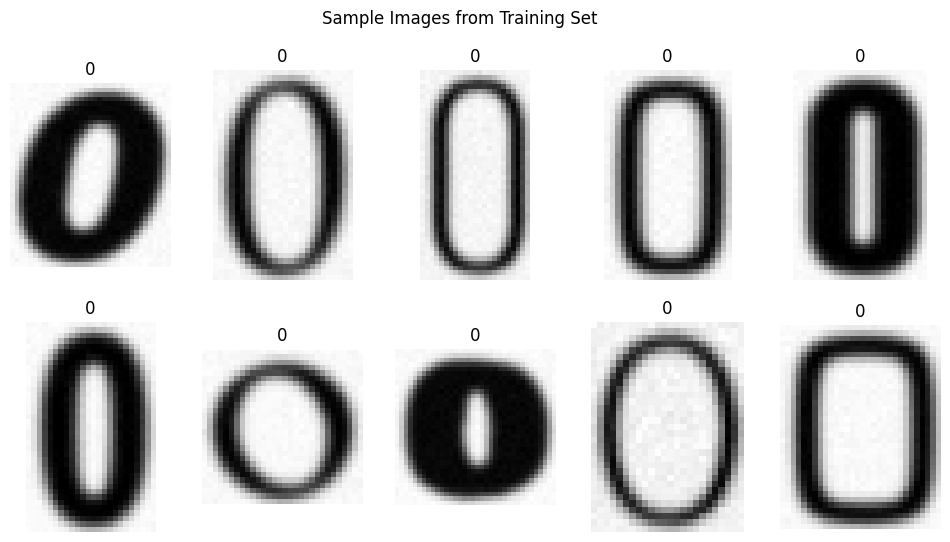

In [9]:
# Visualizing a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(2):
    for j in range(5):
        img, label = training_images[i * 5 + j]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(label)
        axes[i, j].axis('off')
plt.suptitle('Sample Images from Training Set')
plt.show()

In [10]:
# Resizing images to a consistent size
target_size = (64, 64)
training_images = [(cv2.resize(img, target_size), label) for img, label in training_images]
testing_images = [(cv2.resize(img, target_size), label) for img, label in testing_images]

# Normalizing pixel values to the range [0, 1]
training_images = [(img / 255.0, label) for img, label in training_images]
testing_images = [(img / 255.0, label) for img, label in testing_images]

In [11]:
# Separating images and labels for training set
X_train, y_train = zip(*training_images)

# Separating images and labels for testing set
X_test, y_test = zip(*testing_images)

# Displaying the size of the training and testing sets
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 20628
Testing Set Size: 1008


In [12]:
from sklearn.preprocessing import LabelEncoder

# Converting labels to numerical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshaping images for  QNN
X_train = np.array(X_train).reshape(-1, 64, 64, 1)
X_test = np.array(X_test).reshape(-1, 64, 64, 1)

Now we can work on building our Quantum Neural Network model for Optimal Character Recognition.